In [1]:
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize, casual_tokenize, MWETokenizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.probability import FreqDist
from nltk import pos_tag

import pandas

# Task 1. Reading the .txt file.

Open with the python open function the file “class_11_biology_chapter_1_0.txt” from the “TEST/biology” folder. Extract the full content of the file in one unique string at the lower case.
NOTE: The following tasks should be done on the string in the lower case.


In [2]:
f = open('./DATA/BIO_CS_DATA/TEST/biology/class_11_biology_chapter_1_0.txt', 'r')

file_str = f.read().lower()

In [3]:
file_str

'chapter 1\nthe living world\n\nchapter 2\nbiological classification\n\nchapter 3\nplant kingdom\n\nchapter 4\nanimal kingdom\n\n \n\nunit i\n\ndiversity in the living world\n\nbiology is the science of life forms and living processes. the living world\ncomprises an amazing diversity of living organisms. early man could\neasily perceive the difference between inanimate matter and living\norganisms. early man deified some of the inanimate matter (wind, sea,\nfire etc.) and some among the animals and plants. a common feature of\nall such forms of inanimate and animate objects was the sense of awe\nor fear that they evoked. the description of living organisms including\nhuman beings began much later in human history. societies which\nindulged in anthropocentric view of biology could register limited\nprogress in biological knowledge. systematic and monumental\ndescription of life forms brought in, out of necessity, detailed systems\nof identification, nomenclature and classification. the 

# Task 2. Obtain the file metadata.

Get the following metadata about the content of the file.
###### HINT: Save the unique tokens obtained by every tokenizer in a set you will need it for the next task.

### 1. The number of sentences extracted by sent_tokenize from nltk.

In [4]:
sentences = sent_tokenize(file_str)

In [6]:
len(sentences)

13

### 2. The number of unique tokens obtained with word_tokenize from nltk.

In [7]:
tokens_word = word_tokenize(file_str)
tokens_word_set = set(tokens_word)

In [9]:
len(tokens_word)

251

### 3. The number of unique tokens obtained with casual_tokenize from nltk.

In [10]:
tokens_casual = casual_tokenize(file_str)
tokens_casual_set = set(tokens_casual)

In [11]:
len(tokens_casual)

254

### 4. The number of unique tokens obtained with MWETokenizer from nltk.

In [12]:
mwe = MWETokenizer([('in', 'the'), ('get', 'a')])
tokens_mwe = mwe.tokenize(casual_tokenize(file_str))
tokens_mwe_set = set(tokens_mwe)

In [13]:
len(tokens_mwe)

251

### 5. The mean number of words (tokens) per sentence in the text by every tokenizer.

In [ ]:
mean_list = []

for s in sentences:
    mean_list.append({
        'word_tokenizer': len(word_tokenize(s)),
        'casual_tokenizer': len(casual_tokenize(s)),
        'MWETokenizer': len(mwe.tokenize(casual_tokenize(s)))
        })

In [15]:
mean_list

[{'word_tokenizer': 35, 'casual_tokenizer': 35, 'MWETokenizer': 34},
 {'word_tokenizer': 11, 'casual_tokenizer': 11, 'MWETokenizer': 11},
 {'word_tokenizer': 14, 'casual_tokenizer': 14, 'MWETokenizer': 14},
 {'word_tokenizer': 17, 'casual_tokenizer': 17, 'MWETokenizer': 17},
 {'word_tokenizer': 8, 'casual_tokenizer': 8, 'MWETokenizer': 8},
 {'word_tokenizer': 23, 'casual_tokenizer': 23, 'MWETokenizer': 23},
 {'word_tokenizer': 15, 'casual_tokenizer': 15, 'MWETokenizer': 15},
 {'word_tokenizer': 16, 'casual_tokenizer': 16, 'MWETokenizer': 16},
 {'word_tokenizer': 23, 'casual_tokenizer': 23, 'MWETokenizer': 23},
 {'word_tokenizer': 23, 'casual_tokenizer': 23, 'MWETokenizer': 23},
 {'word_tokenizer': 39, 'casual_tokenizer': 39, 'MWETokenizer': 39},
 {'word_tokenizer': 26, 'casual_tokenizer': 29, 'MWETokenizer': 27},
 {'word_tokenizer': 1, 'casual_tokenizer': 1, 'MWETokenizer': 1}]

# Task 3. Comparing the Stemmers.

Get the union of all unique tokens found by every tokenizer. 

Use this new created set to find the stemmed form of this token generated by every of the following stemmers - **PorterStemmer**, **LancasterStemmer** and **SnowballStemmer**.

Save the result in a pandas DataFrame. Compare the result and differences of every stemmer.

In [33]:
token_union = tokens_word_set.union(tokens_casual_set).union(tokens_mwe_set)

Setarea stemmer-urilor

In [18]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

Obtinem listele necesare pentru DateFrame

In [19]:
original_token_list = [t for t in token_union]
stemmed_list_porter = [porter.stem(t) for t in token_union]
stemmed_list_lancaster = [lancaster.stem(t) for t in token_union]
stemmed_list_snowball = [snowball.stem(t) for t in token_union]

Cream un DateFrame.

In [20]:
df = pandas.DataFrame(data={
    'original_token': original_token_list,
    'porter': stemmed_list_porter,
    'lancaster': stemmed_list_lancaster,
    'snowball': stemmed_list_snowball
    })

In [21]:
df

,original_token,porter,lancaster,snowball
0,perceive,perceiv,perceiv,perceiv
1,description,descript,describ,descript
2,in,in,in,in
3,.,.,.,.
4,among,among,among,among
...,...,...,...,...
133,objects,object,object,object
134,recognition,recognit,recognit,recognit
135,will,will,wil,will
136,some,some,som,some


# Task 4. Frequencies of words.

Using the lower case string obtained from the file, get the frequencies of the word. What are the 10 most frequent tokens? 

Extract the list of the hapaxes.

Plot the frequency of the words in the descending order as a scatter plot, How similar it is to the zipf law? Why?


In [22]:
freq_dist = FreqDist(casual_tokenize(file_str))
most_common = freq_dist.most_common(10)

In [23]:
freq_dist

FreqDist({'of': 17, 'the': 13, '.': 12, 'and': 11, 'living': 9, ',': 9, 'in': 6, 'organisms': 6, 'chapter': 4, 'a': 4, ...})

In [24]:
most_common

[('of', 17),
 ('the', 13),
 ('.', 12),
 ('and', 11),
 ('living', 9),
 (',', 9),
 ('in', 6),
 ('organisms', 6),
 ('chapter', 4),
 ('a', 4)]

In [25]:
hapaxes = freq_dist.hapaxes()

In [26]:
hapaxes

['1',
 '2',
 '3',
 'plant',
 '4',
 'animal',
 'i',
 'is',
 'science',
 'processes',
 'comprises',
 'an',
 'amazing',
 'easily',
 'perceive',
 'difference',
 'between',
 'deified',
 '(',
 'wind',
 'sea',
 'fire',
 'etc',
 ')',
 'common',
 'feature',
 'animate',
 'objects',
 'sense',
 'awe',
 'or',
 'fear',
 'they',
 'evoked',
 'beings',
 'began',
 'much',
 'later',
 'history',
 'societies',
 'indulged',
 'anthropocentric',
 'view',
 'register',
 'limited',
 'progress',
 'knowledge',
 'systematic',
 'monumental',
 'brought',
 'out',
 'necessity',
 'detailed',
 'systems',
 'identification',
 'nomenclature',
 'biggest',
 'spin',
 'off',
 'studies',
 'recognition',
 'sharing',
 'similarities',
 'both',
 'horizontally',
 'vertically',
 'present',
 'day',
 'are',
 'related',
 'each',
 'other',
 'also',
 'ever',
 'lived',
 'on',
 'earth',
 'revelation',
 'humbled',
 'led',
 'cultural',
 'movements',
 'for',
 'conservation',
 'biodiversity',
 'following',
 'chapters',
 'you',
 'will',
 'get',
 

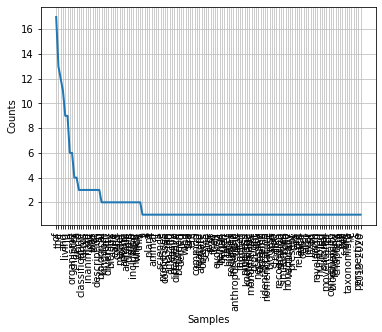

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
freq_dist.plot()

- Se observa, in primul rand, ca majoritatea cuvintelor sunt hapaxe din cauza ca corpus-ul este mic.
- Din acelasi motiv, se observa 'alunecari' din ce in ce mai vizible apropiindu-ne de y=1.
- Daca am fi avut un corpus gigantic, graficul ar fi fost apropiat de o functie liniara la aparenta.
- Din grafic se observa ca fie avem cuvinte foarte des intalnite, fie avem hapaxe, ceea ce indica ca avem un corpus mic.

# Task 5. Part of speech tagging.

Extract from the text the part of speech of every token, and group them in dictionary with the following form:

##### {“POS” : [list of tokens with this POS] }

What is the most common part of speech and why? What is the part of speech that has the smallest frequency?

In [28]:
pos = pos_tag(casual_tokenize(file_str))
pos_dict = { tag: [] for (word, tag) in pos }

for (word, tag) in pos:
    pos_dict[tag].append(word)

In [29]:
pos_dict

{'NN': ['chapter',
  'living',
  'world',
  'chapter',
  'classification',
  'chapter',
  'plant',
  'kingdom',
  'chapter',
  'kingdom',
  'unit',
  'diversity',
  'living',
  'world',
  'biology',
  'science',
  'life',
  'living',
  'living',
  'world',
  'diversity',
  'living',
  'man',
  'difference',
  'matter',
  'man',
  'matter',
  'wind',
  'sea',
  'fire',
  'etc',
  'feature',
  'inanimate',
  'sense',
  'awe',
  'fear',
  'description',
  'living',
  'history',
  'view',
  'biology',
  'progress',
  'knowledge',
  'description',
  'life',
  'necessity',
  'identification',
  'nomenclature',
  'classification',
  'spin',
  'recognition',
  'sharing',
  'living',
  'day',
  'living',
  'earth',
  'revelation',
  'man',
  'conservation',
  'biodiversity',
  'unit',
  'description',
  'classification',
  'taxonomistâ'],
 'CD': ['1', '2', '3', '4'],
 'DT': ['the',
  'the',
  'the',
  'the',
  'an',
  'the',
  'some',
  'the',
  'some',
  'the',
  'a',
  'all',
  'the',
  'the'

Determinam frecventa partilor de vorbire in corpus-ul dat.

In [30]:
pos_tag_fd = FreqDist(tag for (word, tag) in pos).most_common()

In [31]:
pos_tag_fd

[('NN', 64),
 ('IN', 34),
 ('DT', 27),
 ('JJ', 26),
 ('NNS', 22),
 ('CC', 12),
 ('.', 12),
 ('VBD', 11),
 (',', 9),
 ('RB', 6),
 ('CD', 4),
 ('MD', 3),
 ('VB', 3),
 ('VBG', 3),
 ('TO', 3),
 ('VBZ', 2),
 ('PRP', 2),
 ('WDT', 2),
 ('VBN', 2),
 ('NNP', 2),
 ('(', 1),
 (')', 1),
 ('RBR', 1),
 ('JJS', 1),
 ('VBP', 1)]

- Se observa ca cea mai frecventa parte de vorbire este substantivul. In cazul corpus-ului nostru asta este un lucru motivat de faptul ca continutul este o lucrare stiintifica si se opereaza cu multi termeni.
- Cele mai putin utilizate parti de vorbire din corpus-ul dat sunt: *adverbul comparativ*, *adjectivul in superlativ* si *verbul in present tense*. Toate aceste se intalnesc o singura data in corpus-ul studiat.